bodypix https://pypi.org/project/tf-bodypix/

In [ ]:
!pip install tf-bodypix[all]

In [ ]:
import tensorflow as tf
from tf_bodypix.api import download_model, load_model, BodyPixModelPaths

bodypix_model = load_model(download_model(
    BodyPixModelPaths.MOBILENET_FLOAT_50_STRIDE_16
))

image = tf.keras.preprocessing.image.load_img('ㅍ포즈.jpg')
image_array = tf.keras.preprocessing.image.img_to_array(image)
result = bodypix_model.predict_single(image_array)

mask1 = result.get_mask(threshold=0.5)
# tf.keras.preprocessing.image.save_img('마스크를 이미지로 저장.jpg', mask1)

mask2 = result.get_mask(threshold=0.9)

In [ ]:
h, w = image_array.shape[:2]
image_array.shape, mask1.shape

((780, 520, 3), TensorShape([780, 520, 1]))

In [ ]:
from google.colab.patches import cv2_imshow
import numpy as np

In [ ]:
import sys
# np array 전체 출력
np.set_printoptions(threshold=sys.maxsize)

In [ ]:
import matplotlib.pyplot as plt

def mask_to_arr(mask):  # ndarray
  h, w = mask.shape[:2]
  return mask.numpy().reshape(h, w)

# 확인
def arr_show(arr1, arr2, title1='', title2=''):
  fig, axis = plt.subplots(1, 2)
  for mask, title, ax in zip ([arr1, arr2], [title1, title2], axis):
    ax.imshow(mask)
    ax.set_title(title)
  plt.show()

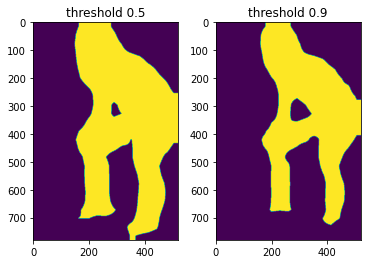

In [ ]:
# threshold 다르게 했을 때
# 뭘로 해야 할까요 ??
arr_show(mask_to_arr(mask1), mask_to_arr(mask2), 'threshold 0.5', 'threshold 0.9')

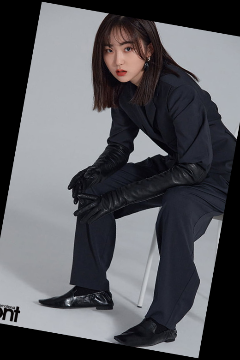

True

In [ ]:
# 이미지 변형 (필요X)
import cv2
from google.colab.patches import cv2_imshow

image2 = cv2.imread('ㅍ포즈.jpg')
h, w = image2.shape[:2]

rotateM = cv2.getRotationMatrix2D((w/2.0, h/2.0), -10, 0.9)
image2 = cv2.warpAffine(image2, rotateM,(w, h))
cv2_imshow(cv2.resize(image2, (240, 360)))
cv2.imwrite('포증.jpg', image2)

In [ ]:
# 찍은 사진 불러오기
image2 = tf.keras.preprocessing.image.load_img('포증.jpg')
image_array2 = tf.keras.preprocessing.image.img_to_array(image2)
result2 = bodypix_model.predict_single(image_array2)

mask3 = result2.get_mask(threshold=0.9)

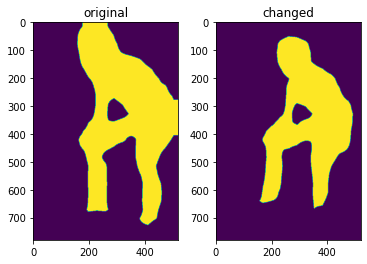

In [ ]:
marr1 = mask_to_arr(mask2)
marr2 = mask_to_arr(mask3)
arr_show(marr1, marr2, 'original', 'changed')

In [ ]:
marr1.shape, marr2.shape

((780, 520), (780, 520))

픽셀간 비교

In [ ]:
# 해밍거리 측정 함수
def hamming_distance(arr1, arr2):
    arr1 = arr1.reshape(1, -1)
    arr2 = arr2.reshape(1, -1)
    # 같은 자리의 값이 서로 다른 것들의 합
    distance = (arr1 != arr2).sum()
    return distance

In [ ]:
pixel_difference = hamming_distance(marr1, marr2)
pixel_score = (h * w - pixel_difference) / (h * w)
pixel_score

0.8362031558185404

different hash
https://github.com/JohannesBuchner/imagehash

In [ ]:
!pip install imagehash

     |████████████████████████████████| 296kB 5.9MB/s 


In [ ]:
from PIL import Image
import imagehash

hash_size = 8
tf.keras.preprocessing.image.save_img('mask2.jpg', mask2)
tf.keras.preprocessing.image.save_img('mask3.jpg', mask3)
hash1 = imagehash.dhash(Image.open('mask2.jpg'), hash_size)
hash2 = imagehash.dhash(Image.open('mask3.jpg'), hash_size)
hash_score = (hash_size ** 2 - (hash1 - hash2)) / hash_size ** 2
hash_score

0.671875